In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from grahping import prepare_coordinate_grids,contour_plot,surface_plot,scatter_plot,vector_field_plot,density_plot,heatmap_plot

|i + (j-1)*Nx> < i + 1 + (j-1)*Nx| 

## Defining the initial values 

### Position states 

In [3]:
#Defining the position states 

x_limit = 41
y_limit = 41
step_count = 15
x_ket = np.zeros(x_limit)
y_ket = np.zeros(y_limit)
x_ket[(x_limit//2)] = 1
y_ket[(y_limit//2)] = 1
y_ket.shape

(41,)

### Hammard Coin 

In [4]:
# Hammard Coin operators 
coin = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],
                 [1/np.sqrt(2), -1/np.sqrt(2)]])

Y_coin = np.array([[1/np.sqrt(2), 1j/np.sqrt(2)],
                 [1j/np.sqrt(2), 1/np.sqrt(2)]])


### Spin State defintions and Spin matrices 

In [5]:
# Defining the Spin States 

# Define the vectors
up = np.array([1, 0])
down = np.array([0, 1])

# Reshape up to be a column vector
up_t = up.reshape(-1, 1)

# Perform the outer product
up_matrix = up_t @ up.reshape(1, -1)

down_t = down.reshape(-1,1)
down_matrix = down_t @ down.reshape(1,-1)


### Writing the shift operator 

In [6]:
#Sx 
n = x_limit * y_limit
S_right_x = np.zeros((n,n))
S_left_x = np.zeros((n,n))
# |i+1><i|
for i in range(0,x_limit-1):
    for j in  range(0,y_limit):
        S_right_x[i+j*x_limit][i+1+j*x_limit] = 1
# |i-1><i|
for i in range(1,x_limit):
    for j in range(0,y_limit):
        S_left_x [i+j*y_limit][i-1+j*y_limit] = 1
S1_x = np.kron(S_right_x,down_matrix)
S2_x = np.kron(S_left_x,up_matrix)
S_x = S1_x + S2_x
S_x



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
#Sy 
S_left_y = np.zeros((n,n))
S_right_y = np.zeros((n,n))
# |i+n><i|
for i in range (0,x_limit):
    for j in range(0,y_limit-2):
        S_right_y[i+y_limit*(j+1)][i+y_limit*(j+2)] = 1
# |i-n><i| 
for i in range(0,x_limit):
    for j in range(1,y_limit):
        S_left_y[i + y_limit*j][i+y_limit*(j-1)]=1
S_y = S_left_y + S_right_y
S1_y = np.kron(S_right_y,down_matrix)
S2_y = np.kron(S_left_y,up_matrix)
S_y = S1_y + S2_y
S_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 1. |Φi⟩ =|12>X|↑> 

In [8]:
zero_ket = np.kron(x_ket,y_ket)
init_state = np.kron(zero_ket,up)
zero_ket.shape
print(init_state)

[0. 0. 0. ... 0. 0. 0.]


In [9]:
state = init_state
coin_adj = np.kron(np.eye(n,n),coin)

# state = coin_adj @ state
# state = S_x @ state 
# state = coin_adj @ state 
# state = S_y @ state
# for i in range(0,state.shape[0]):
#     if(state[i]!=0):
#         print(i)
# print(state)

print(state)
for _ in range (step_count):
    state = coin_adj @ state
    state = S_x @ state 
    state = coin_adj @ state 
    state = S_y @ state
# Initialize state_prob to store the probabilities (squared magnitudes)
state_prob = np.zeros_like(state)

# Calculate the probability for each state
for i in range(state.shape[0]):
    state_prob[i] = np.abs(state[i])**2  # Calculate squared magnitude

pos_prob = np.zeros((n, 1))

# Combine the probabilities for even/odd indexed positions
for i in range(0, 2 * n):
    if i % 2 == 0:
        pos_prob[i // 2] += state_prob[i]
    else:
        pos_prob[(i - 1) // 2] += state_prob[i]
print(np.sum(pos_prob))
#Convert to 2d grid 
# # print(pos_prob)
# grid2 = np.zeros((x_limit,y_limit))
# for i in range(0,n):
#     x = i % x_limit
#     y = i // y_limit
#     grid2[x][y] = pos_prob[i,0]
grid2 = pos_prob.reshape(x_limit,y_limit)
# print(grid2)

[0. 0. 0. ... 0. 0. 0.]
0.9999999999999949


# 2. |Φi⟩ = |↓>  X | 12 >  

In [10]:
init_state2 = np.kron(zero_ket,down)
state = init_state2
for _ in range (step_count):
    state = coin_adj @ state
    state = S_x @ state 
    state = coin_adj @ state 
    state = S_y @ state
# print(state)
# Initialize state_prob to store the probabilities (squared magnitudes)
state_prob = np.zeros_like(state)

# Calculate the probability for each state
for i in range(state.shape[0]):
    state_prob[i] = np.abs(state[i])**2  # Calculate squared magnitude

pos_prob = np.zeros((n, 1))

# Combine the probabilities for even/odd indexed positions
for i in range(0, 2 * n):
    if i % 2 == 0:
        pos_prob[i // 2] += state_prob[i]
    else:
        pos_prob[(i - 1) // 2] += state_prob[i]
print(np.sum(pos_prob))
#Convert to 2d grid 
grid3 = pos_prob.reshape(x_limit,y_limit)
# for i in range(0,n):
#     x = i % x_limit
#     y = i // y_limit
#     grid3[x][y] = pos_prob[i,0]
# print(grid3)

0.9999999999999949


# 3. Superposition state **|Φsym⟩ = √2( |↑⟩ + i| ↓⟩ )⊗|12⟩**

In [11]:
up_coef = 1/np.sqrt(2)
down_coef = 1j/np.sqrt(2)
coin_adj2 = np.kron(np.eye(n,n),coin)
spin_superpos = up_coef*up + down_coef*down
init_state3 = np.kron(zero_ket,spin_superpos)
state = init_state3
for _ in range (step_count):
    state = coin_adj @ state
    state = S_x @ state 
    state = coin_adj @ state 
    state = S_y @ state
# print(state)
# Initialize state_prob to store the probabilities (squared magnitudes)
state_prob = np.zeros_like(state)

# Calculate the probability for each state by multiplying with its complex conjugate
for i in range(state.shape[0]):
    state_prob[i] = state[i] * np.conjugate(state[i])

pos_prob = np.zeros((n, 1))
# Combine the probabilities for even/odd indexed positions
for i in range(0, 2 * n):
    if i % 2 == 0:
        pos_prob[i // 2] += state_prob[i].real
    else:
        pos_prob[(i - 1) // 2] += state_prob[i].real
#Convert to 2d grid 
print(np.sum(pos_prob))
grid4 = pos_prob.reshape(x_limit,y_limit)
# for i in range(0,n):
#     x = i % x_limit
#     y = i // y_limit
#     grid4[x][y] = pos_prob[i,0]
# print(grid)

0.9999999999999946


# PLOTS

In [12]:
from grahping import prepare_coordinate_grids,contour_plot,surface_plot,scatter_plot,vector_field_plot,density_plot,heatmap_plot
label1 = "|Φi⟩ =|↑> X |12>"
label2 = "|Φi⟩ = |↓>  X | 12 > "
label3 = "|Φsym⟩ = √2( |↑⟩ + i| ↓⟩ )⊗|12⟩"

### Contour Plot Comparisons 

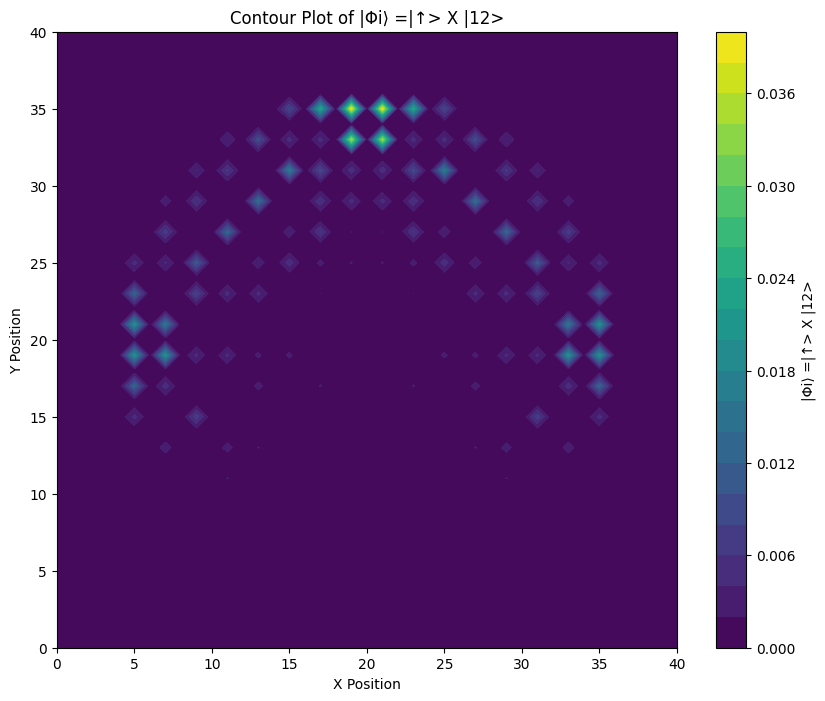

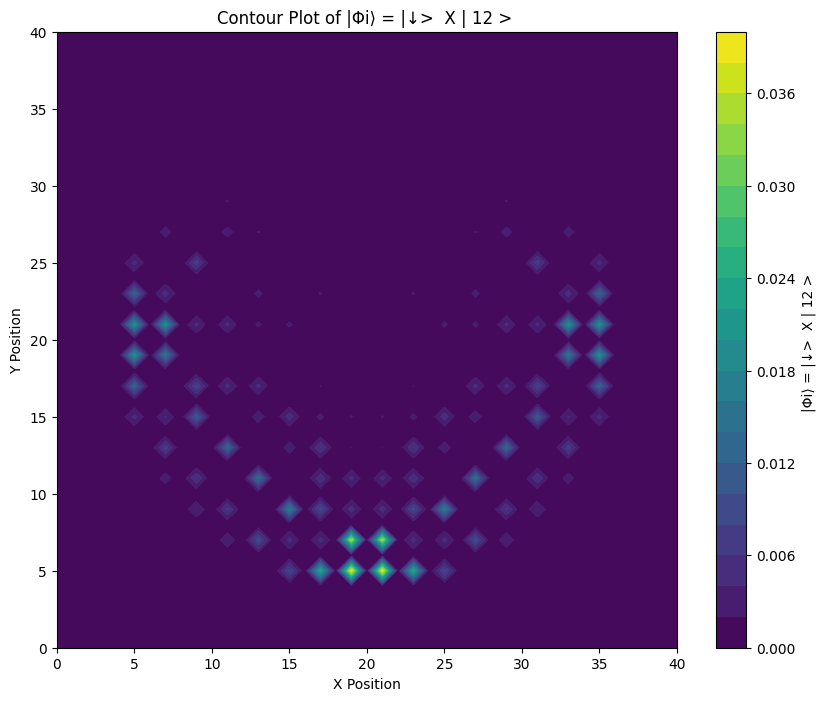

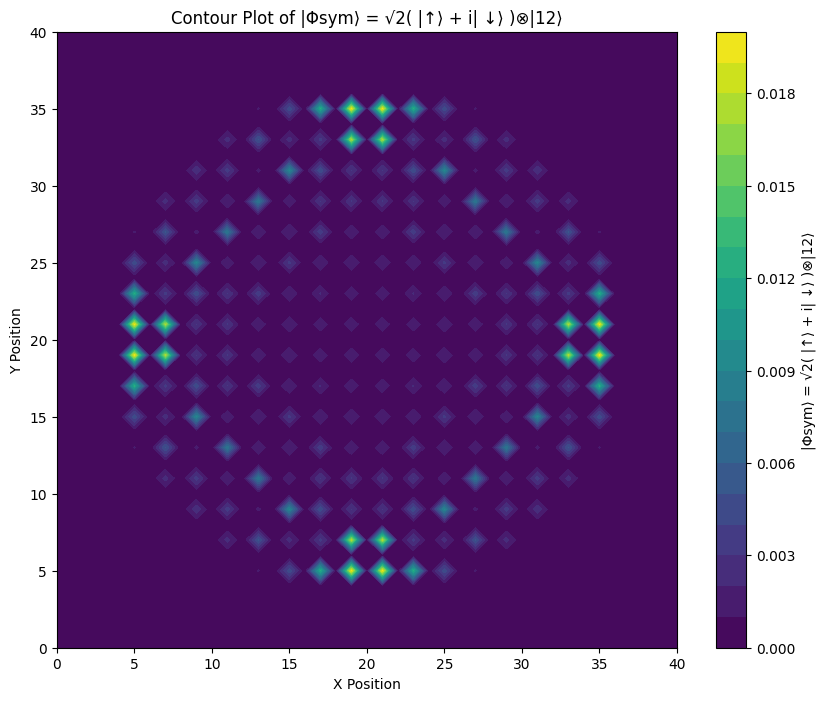

In [13]:
val = [grid2,grid3,grid4]
label = [label1,label2,label3]
for i in range(0,3):
    contour_plot(val[i],label[i])

### Surface Plots

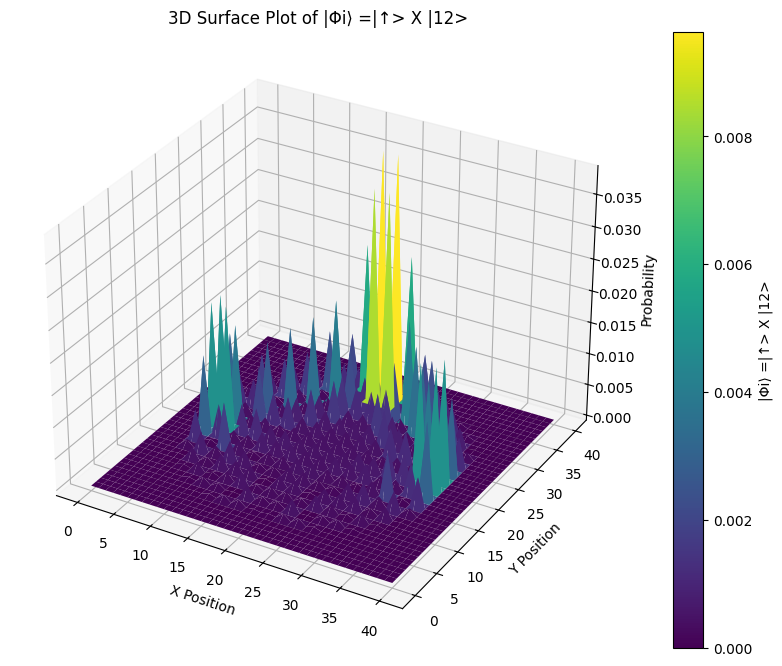

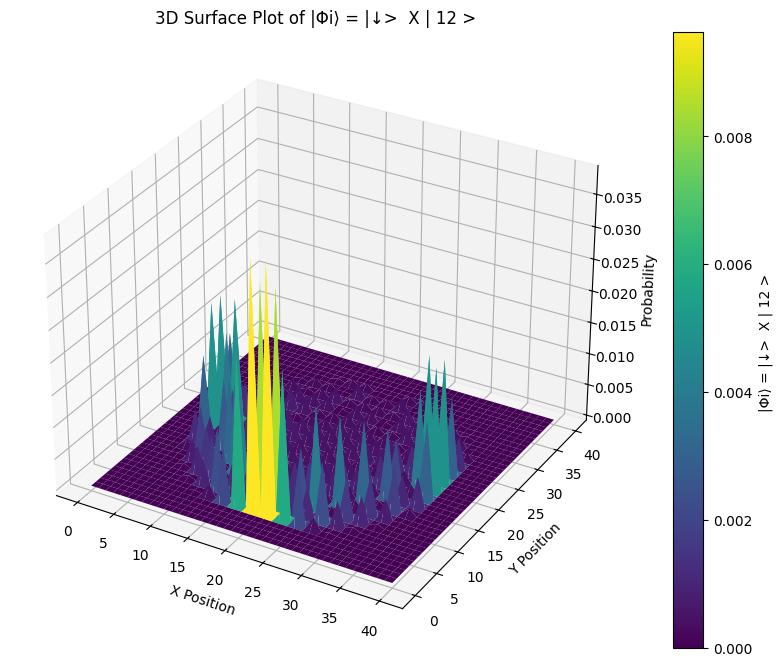

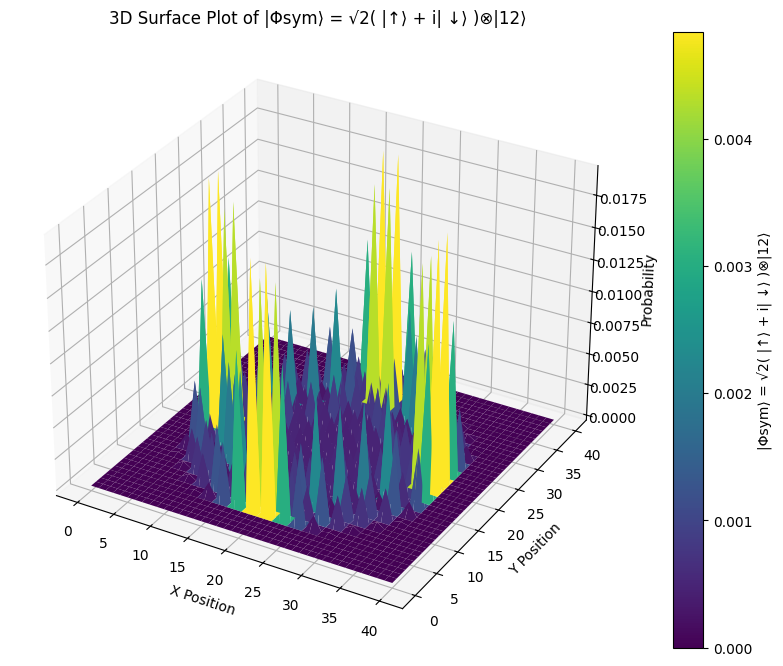

In [14]:
val = [grid2,grid3,grid4]
label = [label1,label2,label3]
for i in range(0,3):
    surface_plot(val[i],label[i])

### Density Plot 

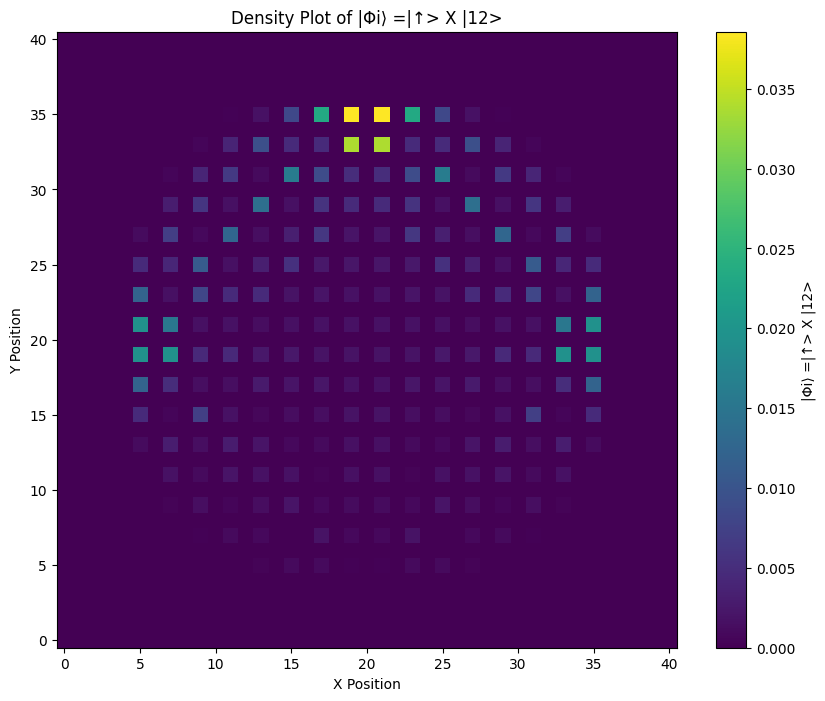

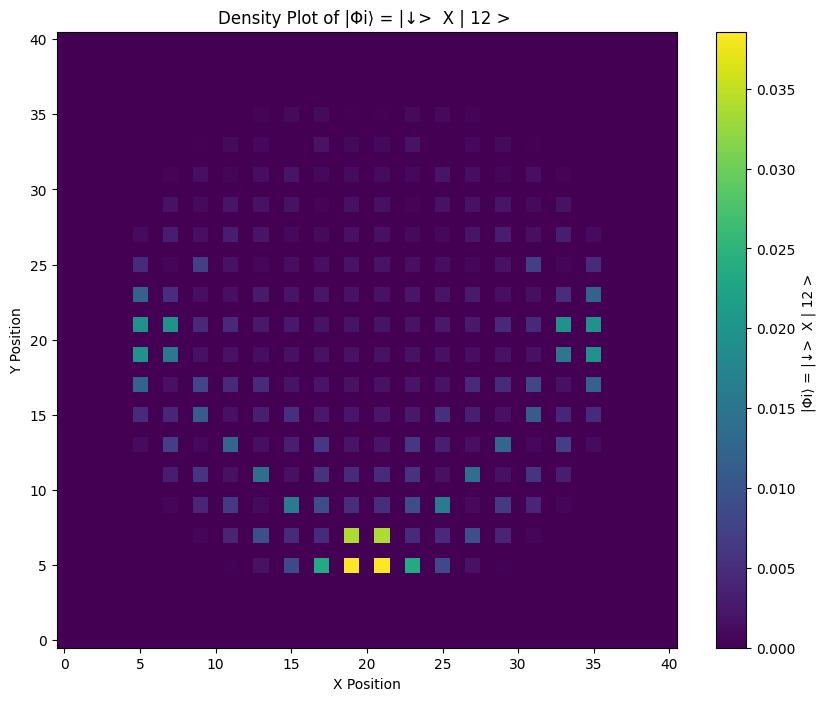

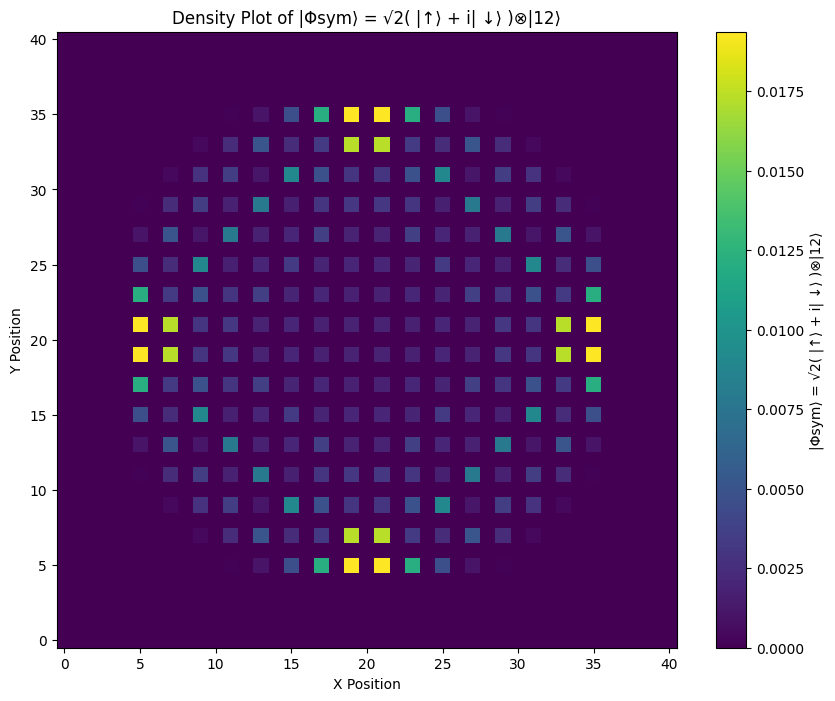

In [15]:
val = [grid2,grid3,grid4]
label = [label1,label2,label3]
for i in range(0,3):
    density_plot(val[i],label[i])

### Heat map plot 

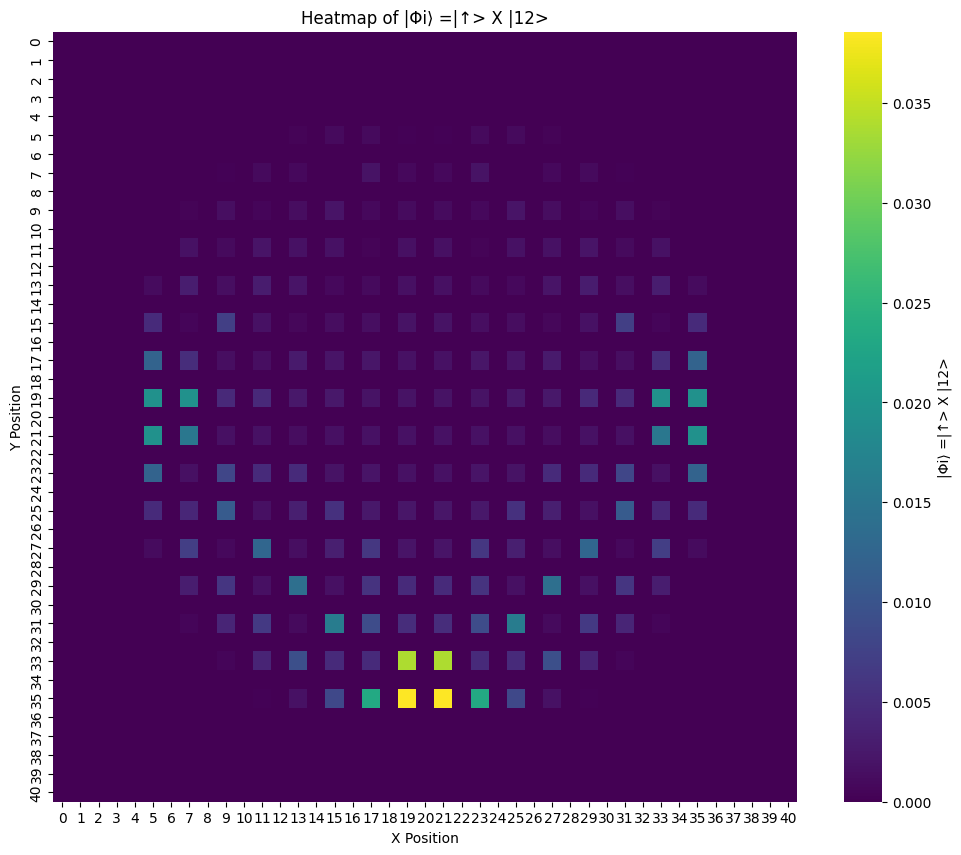

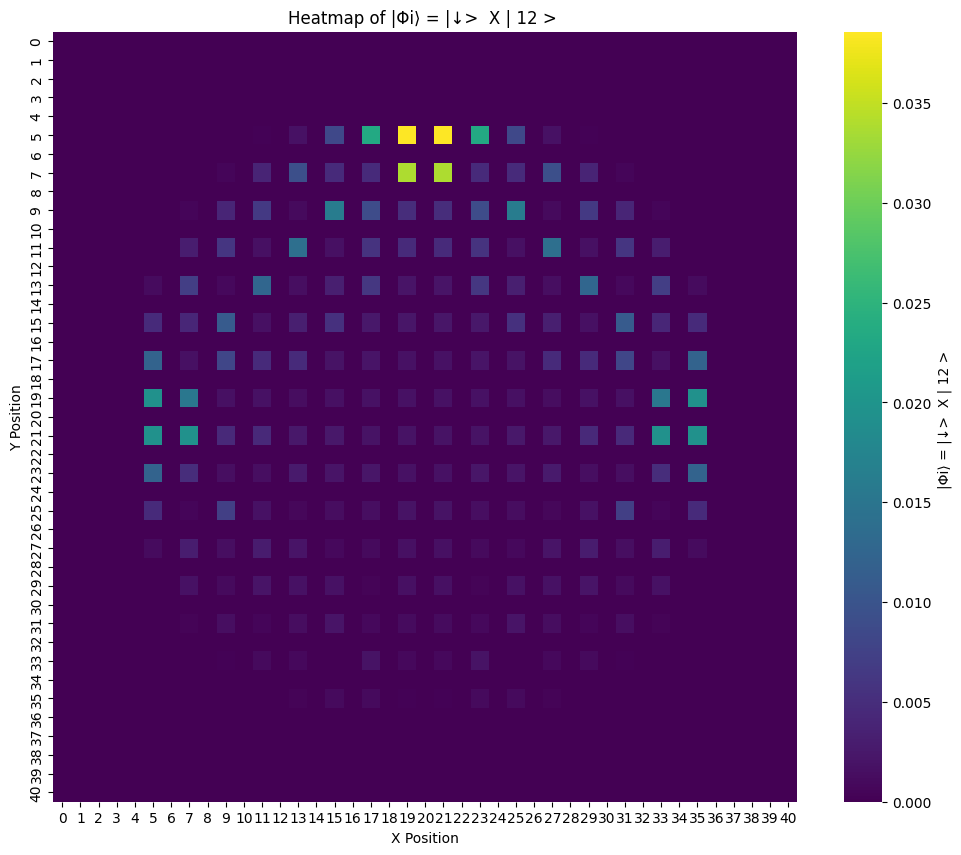

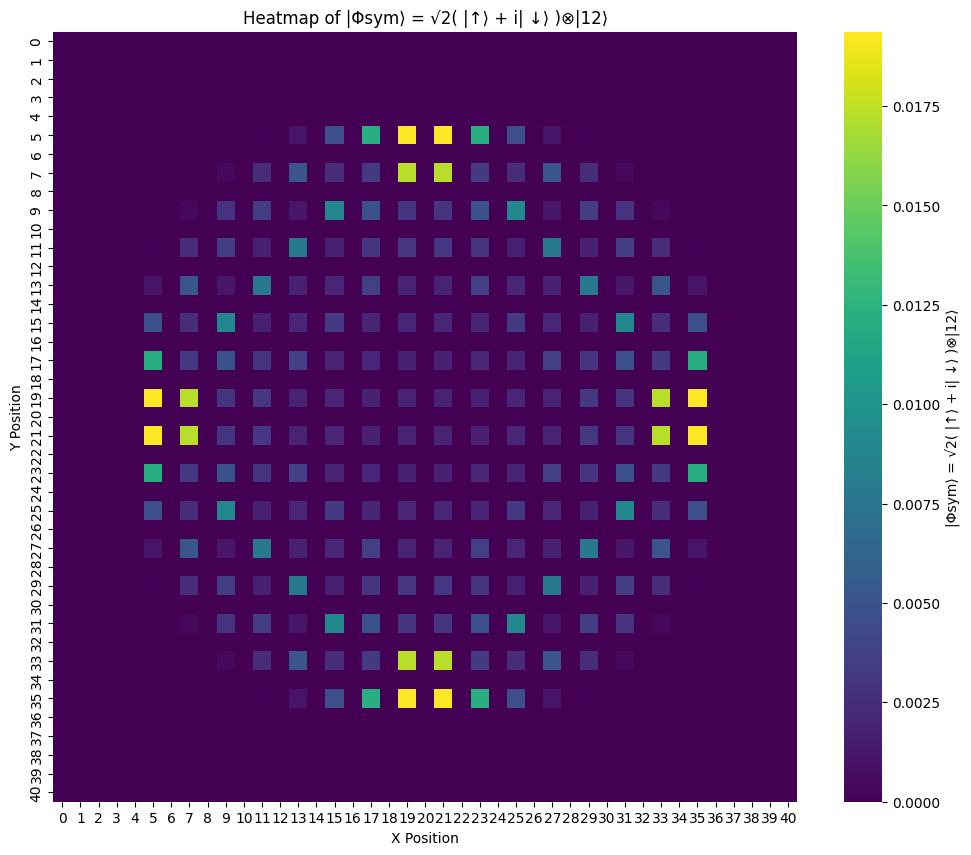

In [16]:

for i in range(0,3):
    heatmap_plot(val[i],label[i])

# N development 

In [17]:
state = init_state
i_values = [0]*step_count
plot = []
for k in range (step_count):
    state = coin_adj @ state
    state = S_x @ state 
    state = coin_adj @ state 
    state = S_y @ state
    # Initialize state_prob to store the probabilities (squared magnitudes)
    state_prob = np.zeros_like(state)
    # Calculate the probability for each state by multiplying with its complex conjugate
    maxi = -1
    max_prob = -1
    for j in range(state.shape[0]):
        state_prob[j] = state[j] * np.conjugate(state[j])
    pos_prob = np.zeros((n, 1))
    # Combine the probabilities for even/odd indexed positions
    for i in range(0, 2 * n):
        if i % 2 == 0:
            pos_prob[i // 2] += state_prob[i].real
        else:
            pos_prob[(i - 1) // 2] += state_prob[i].real
    #Convert to 2d grid 
    print(np.sum(pos_prob))
    grid4 = np.zeros((x_limit,y_limit))
    for i in range(0,n):
        x = i % x_limit
        y = i // y_limit
        grid4[x][y] = pos_prob[i,0]
    max_index = np.unravel_index(np.argmax(grid4), grid4.shape)
    plot.append((k,np.sqrt((x_limit//2 - max_index[0])**2+ (y_limit//2 - max_index[1])**2)))




0.9999999999999996
0.9999999999999993
0.9999999999999992
0.9999999999999987
0.9999999999999987
0.999999999999998
0.9999999999999978
0.9999999999999974
0.9999999999999971
0.9999999999999966
0.9999999999999962
0.999999999999996
0.9999999999999956
0.9999999999999952
0.9999999999999949


(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)


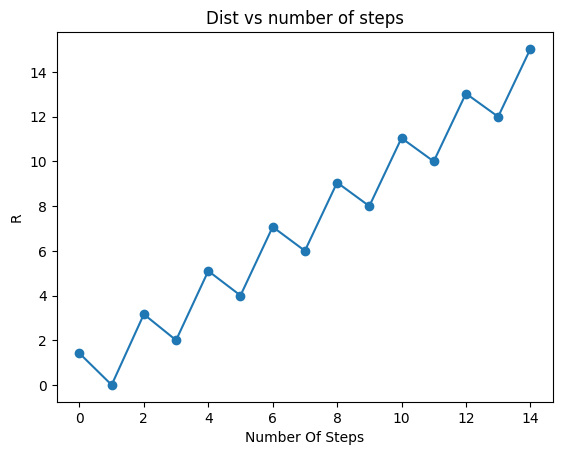

In [18]:
# Separate into x and y values
x, y = zip(*plot)
print(x)
# Plot the data
plt.plot(x, y, marker='o')

# Add labels and title
plt.xlabel('Number Of Steps')
plt.ylabel('R')
plt.title('Dist vs number of steps')

# Show the plot
plt.show()